## 1. Importing libraries

In [709]:
!pip install pycountry
!pip install pycountry-convert
!pip install iso3166

In [710]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py 
from plotly.offline import iplot
import plotly.graph_objs as go
%matplotlib inline
import seaborn as sns
import os
import itertools
import pycountry
from IPython.display import Image
import pycountry_convert as pc
import iso3166
WTF = Image(filename = "6655571711_8e6d54e899.jpg", width = 200)
ImATofuKiller = Image(filename = "tofukiller.png", width = 200)

## 2. Reading csv

In [711]:
data = pd.read_csv("FAO.csv", sep=",", encoding="latin-1")

## 3. Inspecting the data

In [712]:
### Let's see how many rows and columns we have ###

data.shape

(21477, 63)

In [713]:
### Let's see the names of our columns ###

data.columns

Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')

In [714]:
### Let's see how the data looks like ###

data.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [715]:
### Let's check our variable types ###

data.info()

### We also see that we have some null values ###
### We'll fill null values with 0, as we'll assume that null means no production ###

data = data.fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
Area Abbreviation    21477 non-null object
Area Code            21477 non-null int64
Area                 21477 non-null object
Item Code            21477 non-null int64
Item                 21477 non-null object
Element Code         21477 non-null int64
Element              21477 non-null object
Unit                 21477 non-null object
latitude             21477 non-null float64
longitude            21477 non-null float64
Y1961                17938 non-null float64
Y1962                17938 non-null float64
Y1963                17938 non-null float64
Y1964                17938 non-null float64
Y1965                17938 non-null float64
Y1966                17938 non-null float64
Y1967                17938 non-null float64
Y1968                17938 non-null float64
Y1969                17938 non-null float64
Y1970                17938 non-null float64
Y1971                1

In [716]:
### By inspecting the variable "Area Abbreviation", we can see that it is the ISO Code for the country ###

data["Area Abbreviation"].unique()

array(['AFG', 'ALB', 'DZA', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS', 'AUT',
       'AZE', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BOL',
       'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'CPV', 'KHM', 'CMR',
       'CAN', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COD', 'CRI', 'CIV',
       'HRV', 'CUB', 'CYP', 'CZE', 'KOR', 'DNK', 'DJI', 'DMA', 'DOM',
       'ECU', 'EGY', 'SLV', 'EST', 'ETH', 'FJI', 'FIN', 'FRA', 'PYF',
       'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN',
       'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'ISL', 'IND', 'IDN', 'IRN',
       'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN',
       'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LTU',
       'LUX', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS',
       'MEX', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD',
       'NCL', 'NZL', 'NIC', 'NER', 'NGA', 'NOR', 'OMN', 'PAK', 'PAN',
       'PRY', 'PER', 'PHL', 'POL', 'PRT', 'QAT', 'MDA', 'ROU', 'RUS',
       'RWA', 'KNA',

In [717]:
### Looks like we can get rid of this column, as we already have the ISO code ###

data["Area Code"].unique()

array([  2,   3,   4,   7,   8,   9,   1,  10,  11,  52,  12,  16,  14,
        57, 255,  23,  53,  17,  19,  80,  20,  21,  26,  27, 233,  35,
       115,  32,  33,  37,  39,  40,  96, 128,  41, 214,  44,  46,  48,
       107,  98,  49,  50, 167, 116,  54,  72,  55,  56,  58,  59,  60,
        63, 238,  66,  67,  68,  70,  74,  75,  73,  79,  81,  84,  86,
        89,  90, 175,  91,  93,  95,  97,  99, 100, 101, 102, 103, 104,
       105, 106, 109, 110, 112, 108, 114,  83, 118, 113, 120, 119, 121,
       122, 123, 126, 256, 129, 130, 131, 132, 133, 134, 136, 137, 138,
       141, 273, 143, 144,  28, 147, 149, 150, 153, 156, 157, 158, 159,
       162, 221, 165, 166, 169, 170, 171, 173, 174, 117, 146, 183, 185,
       184, 188, 189, 191, 244, 193, 194, 195, 272, 197, 199, 198,  25,
       202, 203,  38, 276, 207, 209, 210, 211, 208, 216, 154, 176, 217,
       220, 222, 223, 213, 226, 230, 225, 229, 215, 231, 234, 235, 155,
       236, 237, 249, 251, 181])

In [718]:
### We'll keep the name of the countries, as they might come handy ###

data["Area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Congo', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea", 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'G

In [719]:
### We will also get rid of this column, as it has no value to us ###

data["Item Code"].unique()

array([2511, 2805, 2513, 2514, 2517, 2520, 2531, 2536, 2537, 2542, 2543,
       2745, 2549, 2551, 2560, 2561, 2563, 2571, 2572, 2573, 2574, 2575,
       2577, 2579, 2580, 2586, 2601, 2605, 2611, 2614, 2615, 2617, 2618,
       2619, 2620, 2625, 2630, 2633, 2635, 2640, 2645, 2655, 2656, 2658,
       2731, 2732, 2734, 2735, 2736, 2740, 2743, 2737, 2744, 2848, 2761,
       2680, 2905, 2907, 2908, 2909, 2911, 2912, 2913, 2914, 2918, 2919,
       2922, 2923, 2924, 2943, 2945, 2946, 2949, 2948, 2960, 2928, 2515,
       2516, 2518, 2532, 2533, 2534, 2546, 2547, 2555, 2556, 2558, 2570,
       2582, 2602, 2612, 2613, 2616, 2641, 2657, 2733, 2781, 2782, 2762,
       2763, 2764, 2765, 2766, 2767, 2769, 2775, 2961, 2562, 2578, 2642,
       2576, 2535, 2557, 2559, 2541, 2581, 2768])

In [720]:
### Food Type, we'll be keeping this! ###

data["Item"].unique()

array(['Wheat and products', 'Rice (Milled Equivalent)',
       'Barley and products', 'Maize and products', 'Millet and products',
       'Cereals, Other', 'Potatoes and products', 'Sugar cane',
       'Sugar beet', 'Sugar (Raw Equivalent)', 'Sweeteners, Other',
       'Honey', 'Pulses, Other and products', 'Nuts and products',
       'Coconuts - Incl Copra', 'Sesame seed',
       'Olives (including preserved)', 'Soyabean Oil', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Cottonseed Oil',
       'Palm Oil', 'Sesameseed Oil', 'Olive Oil', 'Oilcrops Oil, Other',
       'Tomatoes and products', 'Vegetables, Other',
       'Oranges, Mandarines', 'Citrus, Other', 'Bananas',
       'Apples and products', 'Pineapples and products', 'Dates',
       'Grapes and products (excl wine)', 'Fruits, Other',
       'Coffee and products', 'Cocoa Beans and products',
       'Tea (including mate)', 'Pepper', 'Spices, Other', 'Wine', 'Beer',
       'Beverages, Alcoholic', 'Bovine 

In [721]:
### We'll keep the "Food | Feed" variable instead ###

data["Element Code"].unique()

array([5142, 5521])

In [722]:
### Food: was meant for humans ###
### Feed: was meant for livestock ###

data["Element"].unique()

array(['Food', 'Feed'], dtype=object)

In [723]:
### We'll just keep in mind that Unit is 1000 tonnes to get rid of this column ###

data["Unit"].unique()

array(['1000 tonnes'], dtype=object)

In [724]:
### We will definitely not be needing this ###

latitude = data["latitude"]
longitude = data["longitude"]

In [725]:
### The rest os the columns are the Years, and we'll be keeping the last 10 ###

## 4. Getting rid of columns we don't need

In [726]:
data = data[["Area Abbreviation", "Area", "Item", "Element",
             "Y2003", "Y2004", "Y2005", "Y2006", "Y2007", "Y2008", "Y2009", "Y2010", "Y2011", "Y2012", "Y2013"]]

In [727]:
### Hello, beauty! ###

data.head()

,Area Abbreviation,Area,Item,Element,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,Afghanistan,Wheat and products,Food,3095.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,460.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,Afghanistan,Barley and products,Feed,48.0,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,Afghanistan,Barley and products,Food,144.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,Afghanistan,Maize and products,Feed,63.0,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


## 5. Some plots can't hurt anyone, can they?

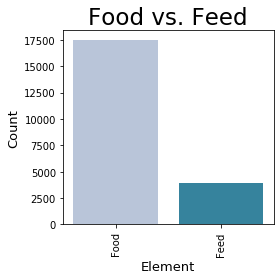

In [728]:
### Plotting Food vs. Feed ###

df = data["Element"].value_counts().reset_index()
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
p = sns.barplot(x=df.iloc[:,0], y=df["Element"], data=df, palette="PuBuGn")
p.set_ylabel("Count", fontsize = 13)
p.set_xlabel("Element", fontsize = 13)
p.set_title("Food vs. Feed", fontsize = 23, color = "black")
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

### Oh, wait...

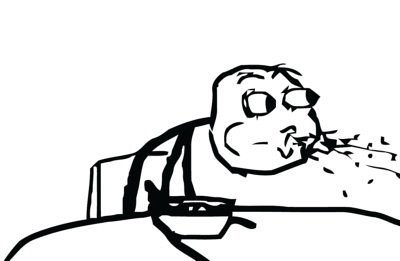

In [729]:
WTF

### Ok, don't panic, let's keep our sh*t together...

In [730]:
### That graph was just counting rows, not values! ###

### Let's add a column with each row's mean and each row's total ###

data["Mean"] = data[["Y2003", "Y2004", "Y2005", "Y2006","Y2007", "Y2008", "Y2009", "Y2010", "Y2011", "Y2012", "Y2013"]].mean(axis=1)
data["Total"] = data[["Y2003", "Y2004", "Y2005", "Y2006","Y2007", "Y2008", "Y2009", "Y2010", "Y2011", "Y2012", "Y2013"]].sum(axis=1)


### We will also round the mean up to 3 ###

data["Mean"] = data["Mean"].round(3)

### Let's check if we did it correctly ###

display(data.head())

### Let's group by Element and take the mean of all the Years
data2 = data.groupby("Element")["Mean", "Element"].agg('mean')
data2 = data2.reset_index()

,Area Abbreviation,Area,Item,Element,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Mean,Total
0,AFG,Afghanistan,Wheat and products,Food,3095.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,4137.182,45509.0
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,460.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,454.091,4995.0
2,AFG,Afghanistan,Barley and products,Feed,48.0,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360,247.364,2721.0
3,AFG,Afghanistan,Barley and products,Food,144.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,80.000,880.0
4,AFG,Afghanistan,Maize and products,Feed,63.0,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200,189.455,2084.0


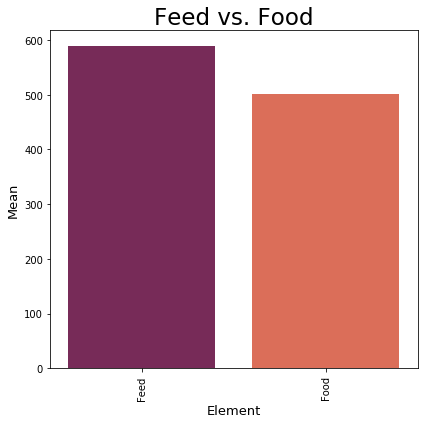

In [731]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
p = sns.barplot(x=data2["Element"], y=data2["Mean"], data=data2, palette="rocket")
p.set_ylabel("Mean", fontsize = 13)
p.set_xlabel("Element", fontsize = 13)
p.set_title("Feed vs. Food", fontsize = 23, color = "black")
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Area,Item,Mean,Element
20427,United States of America,Soyabeans,1923.182,Feed
20428,United States of America,Soyabeans,11.727,Food


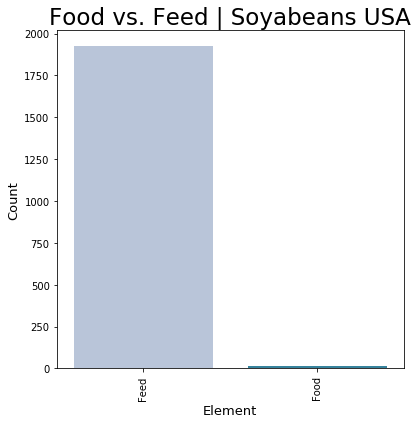

In [732]:
### Let's build a table where we can check Soyabean production per element by the USA ###

USAbeans = data[["Area", 'Item', "Mean", "Element"]].loc[data['Area'] == "United States of America"][data["Item"] == "Soyabeans"]
display(USAbeans)

### Let's plot it in order to relieve earlier's pain... ###

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
p = sns.barplot(x=USAbeans["Element"], y=USAbeans["Mean"], data=USAbeans, palette="PuBuGn")
p.set_ylabel("Count", fontsize = 13)
p.set_xlabel("Element", fontsize = 13)
p.set_title("Food vs. Feed | Soyabeans USA", fontsize = 23, color = "black")
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

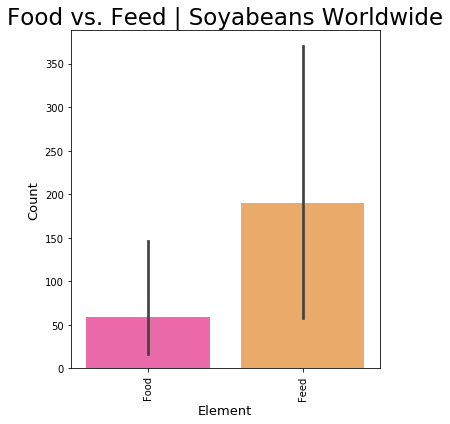

In [733]:
worldbeans = data[["Area", 'Item', "Mean", "Element"]].loc[data["Item"] == "Soyabeans"]


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
p = sns.barplot(x=worldbeans["Element"], y=worldbeans["Mean"], data=worldbeans, palette="spring")
p.set_ylabel("Count", fontsize = 13)
p.set_xlabel("Element", fontsize = 13)
p.set_title("Food vs. Feed | Soyabeans Worldwide", fontsize = 23, color = "black")
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

## Yeah!!!

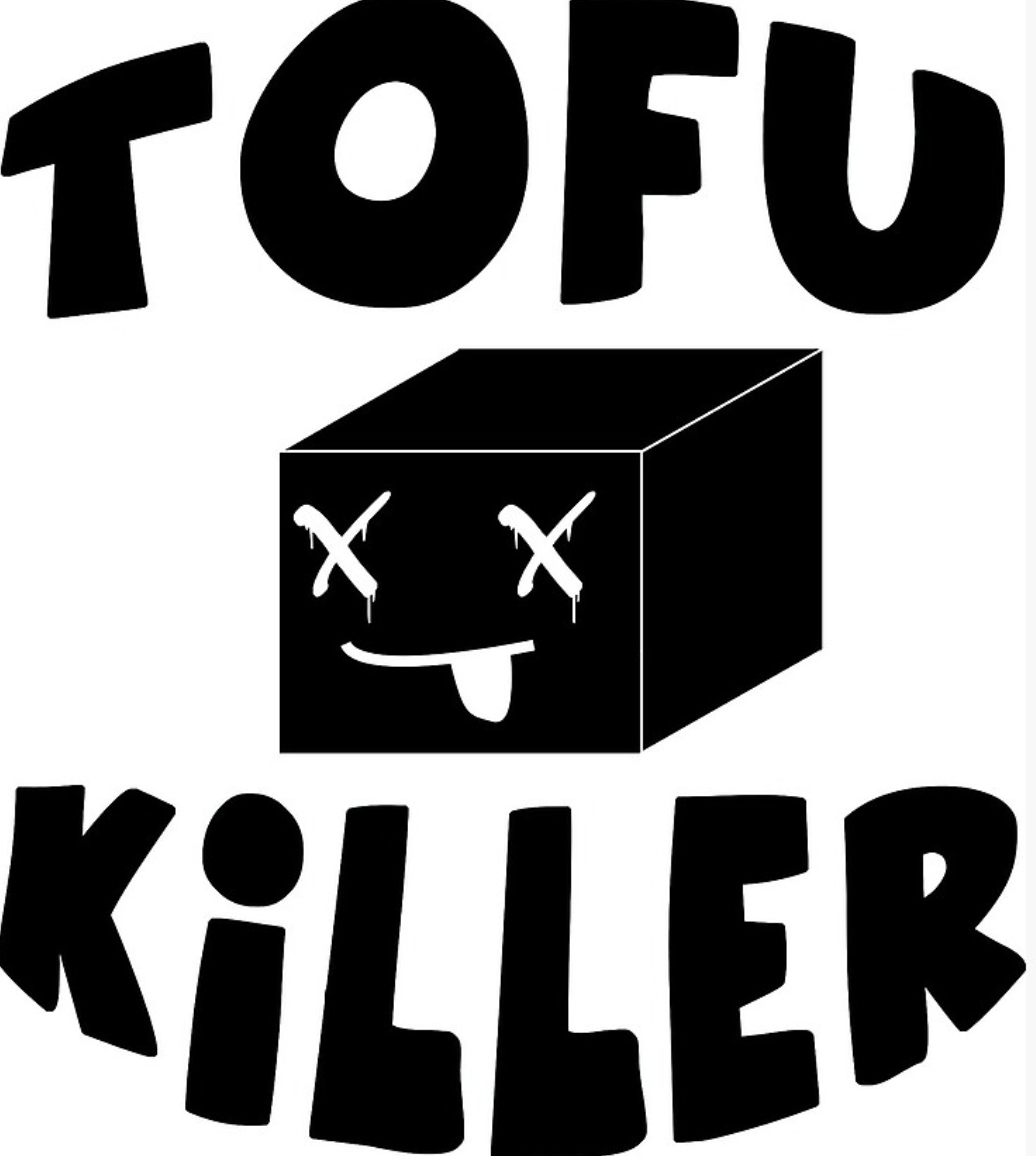

In [734]:
ImATofuKiller

In [735]:
### I've spent hours breaking my head trying to apply pycountry-convert. No success so far ###

## Top 10 producers

(0, 25000)

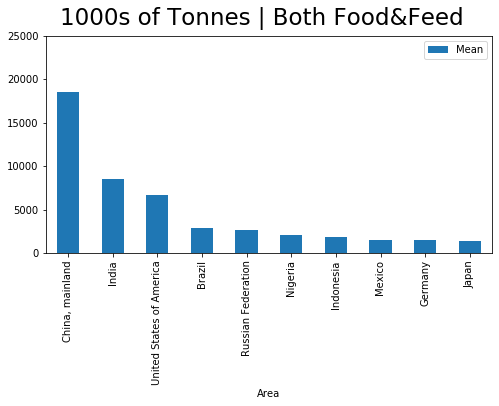

In [736]:
### Top 10 producers ###

top10countries = data.groupby(['Area'])['Mean', "Element"].agg('mean')
top10countries = top10countries.sort_values(by = "Mean", ascending=False).head(10)

fig, ax=plt.subplots(1,1,figsize=(8,4))
fig.suptitle('1000s of Tonnes | Both Food&Feed', fontsize=23)

top10countries.plot(kind='bar', ax=ax, rot=90);
ax.set_ylim(0,25000)

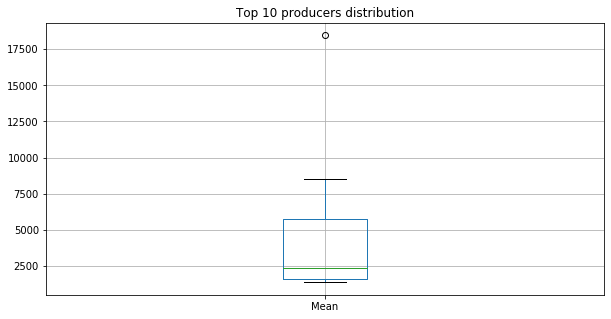

In [737]:
### Let's check the top 10 in a boxplot ###

plt.figure(figsize=(10,5))
top10countries.boxplot(column="Mean")
plt.title ("Top 10 producers distribution")
plt.show()

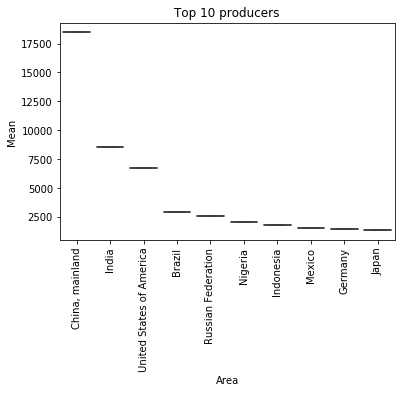

In [741]:

top10 = data.groupby(['Area'])["Y2003", "Y2004", "Y2005", "Y2006","Y2007", 
                               "Y2008", "Y2009", "Y2010", "Y2011", "Y2012",
                               "Y2013", "Mean"].agg('mean').sort_values(by="Mean", ascending=False)
top10 = top10.head(10)
top10 = top10.reset_index()
ax = sns.boxplot(x="Area", y="Mean", data=top10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Top 10 producers")
plt.show()


### Differences are too huge ###

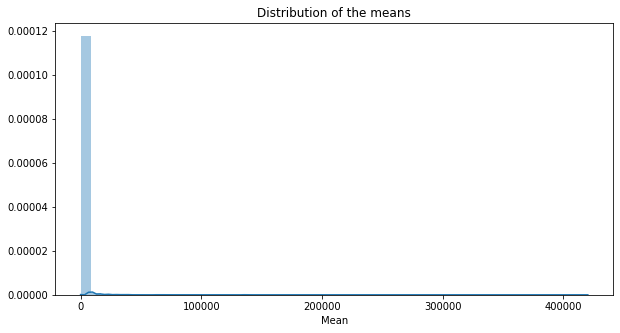

In [742]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax = sns.distplot(a=data['Mean'])
plt.title("Distribution of the means")
plt.show()

In [561]:
### We can see that the distribution of the top 10 producers is skewed to the right. ###

## Top 10 producers Food vs. Feed

(0, 25000)

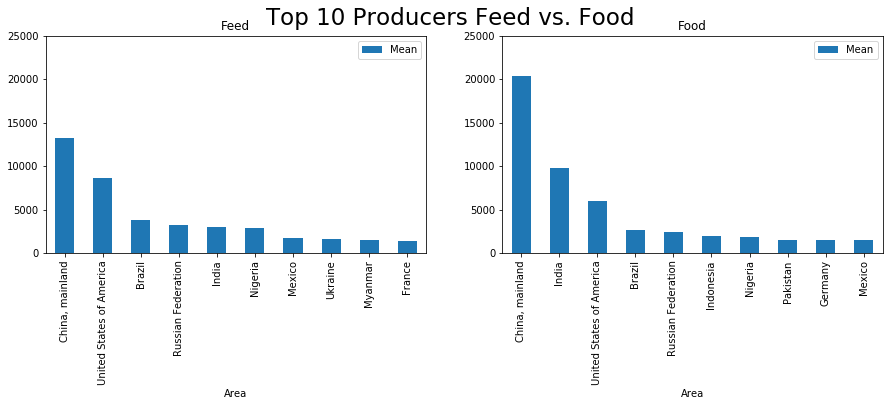

In [620]:
### Now, let's check if the top 10 changes when separating by Feed or Food. ###

feed = data[data["Element"] == "Feed"]
food = data[data["Element"] == "Food"]

### Top 10 Feed producers ###

top10countriesfeed = feed.groupby(['Area'])['Mean',"Element"].agg('mean')
top10countriesfeed = top10countriesfeed.sort_values(by = "Mean", ascending=False).head(10)
top10countriesfood = food.groupby(['Area'])['Mean',"Element"].agg('mean')
top10countriesfood = top10countriesfood.sort_values(by = "Mean", ascending=False).head(10)

fig, [ax1, ax2] =plt.subplots(1,2,figsize=(15,4))
fig.suptitle('Top 10 Producers Feed vs. Food', fontsize=23)


ax1=top10countriesfeed.plot(kind='bar', ax=ax1, rot=90)
ax1.set_title("Feed")
ax1.set_ylim(0,25000)

ax2 = top10countriesfood.plot(kind='bar', ax=ax2, rot=90)
ax2.set_title("Food")
ax2.set_ylim(0,25000)

#### We can see that USA scales to the 2nd position when it comes to "Feed" producing.

## Food and feed evolution from 2003 to 2013

Text(0.5, 1.0, 'Food and Feed production evolution')

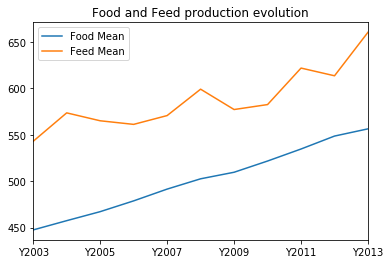

In [534]:
yearsfood = food[["Y2003", "Y2004", "Y2005", "Y2006", "Y2007", "Y2008", "Y2009", "Y2010", "Y2011", "Y2012", "Y2013"]].T
yearsfeed = feed[["Y2003", "Y2004", "Y2005", "Y2006", "Y2007", "Y2008", "Y2009", "Y2010", "Y2011", "Y2012", "Y2013"]].T

line = data.groupby(["Element"])["Element","Y2003", "Y2004", "Y2005", "Y2006", "Y2007", "Y2008", "Y2009", "Y2010", "Y2011", "Y2012", "Y2013"].agg('sum')

yearsfood["Food Mean"] = yearsfood.mean(axis=1)
yearsfeed["Feed Mean"] = yearsfeed.mean(axis=1)
yearsfood = yearsfood["Food Mean"]
yearsfeed = yearsfeed["Feed Mean"]


yearsfood.plot()
yearsfeed.plot()
plt.legend()
plt.title("Food and Feed production evolution")



## Top 3 produced Items

In [542]:
top3items = data.groupby(["Item"]).agg('sum')
top3items = top3items.sort_values(by="Total", ascending=False).head(3)
top3items

,,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Mean,Total
Item,Element,,,,,,,,,,,,,
Milk - Excluding Butter,Food,990482.0,1015364.0,1048112.0,1081776.0,1116976.0,1134316.0,1159200.0,1187806.0,1220202.0,1257644,1259476,1133759.452,12471354.0
Cereals - Excluding Beer,Food,910053.0,919231.0,928890.0,942238.0,952219.0,967413.0,973744.0,992593.0,1003292.0,1012534,1029017,966474.909,10631224.0
Vegetables,Food,746718.0,754509.0,773213.0,804133.0,828334.0,853881.0,875817.0,903198.0,927965.0,964222,982974,855905.822,9414964.0


In [550]:
### As suspected, most of the milk production is meant for human consumption ###
### Looks like our mom's milk wasn't enough ###

milk = data.loc[data['Item'] == "Milk - Excluding Butter"]
milk = milk.groupby(["Element"])["Mean"].agg('mean')
display(milk)

Element
Feed     711.376657
Food    3257.929460
Name: Mean, dtype: float64

In [552]:
### Significant amount of cereals is meant for livestock feeding, although human's is greater ###

cereals = data.loc[data['Item'] == "Cereals - Excluding Beer"]
cereals = cereals.groupby(["Element"])["Mean"].agg('mean')
display(cereals)

Element
Feed    4467.790306
Food    5554.453500
Name: Mean, dtype: float64

In [565]:
### Greens, greens and greens for humans ###

vegetables = data.loc[data['Item'] == "Vegetables"]
vegetables = vegetables.groupby(["Element"])["Mean"].agg('mean')
display(vegetables)

Element
Feed     524.994643
Food    4918.998977
Name: Mean, dtype: float64

## Bayes

In [708]:
priors = [1/2, 1/2]
likelihoods = [0.278, 0.712]

def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

bayes_rule(priors, likelihoods)

array([0.28080808, 0.71919192])

In [743]:
print("28% chance if we pick a Soyabeans row is for Food and 72% chance is for Feeding purposes")

28% chance if we pick a Soyabeans row is for Food and 72% chance is for Feeding purposes
